In [7]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [3]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [5]:
model = Sequential()

model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 22s 46ms/step - loss: 0.4276 - accuracy: 0.8504 - val_loss: 0.3655 - val_accuracy: 0.8691
Epoch 2/10
469/469 [==============================] - 23s 49ms/step - loss: 0.2840 - accuracy: 0.8979 - val_loss: 0.3066 - val_accuracy: 0.8847
Epoch 3/10
469/469 [==============================] - 21s 45ms/step - loss: 0.2338 - accuracy: 0.9158 - val_loss: 0.2808 - val_accuracy: 0.8969
Epoch 4/10
469/469 [==============================] - 24s 50ms/step - loss: 0.2006 - accuracy: 0.9269 - val_loss: 0.2823 - val_accuracy: 0.8981
Epoch 5/10
469/469 [==============================] - 29s 62ms/step - loss: 0.1737 - accuracy: 0.9359 - val_loss: 0.2886 - val_accuracy: 0.8982
Epoch 6/10
469/469 [==============================] - 28s 60ms/step - loss: 0.1484 - accuracy: 0.9451 - val_loss: 0.2798 - val_accuracy: 0.9063
Epoch 7/10
469/469 [==============================] - 28s 60ms/step - loss: 0.1278 - accuracy: 0.9536 - val_loss: 0.2916 - val_accuracy:

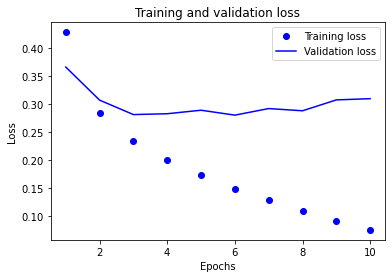

In [8]:
history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()